# Homework 3
## Elliot, Luis, Sam, Zach

In [3]:
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import statsmodels.api as sm
from IPython.display import display, Markdown

In [4]:
cars = pd.read_csv('http://www.rob-mcculloch.org/data/susedcars.csv')

## Linear Fit

In [5]:
# is this idiomatic? haven't done a linear model in python before...
# @above, probably better to separate X and Y into vars -luis
lm = linear_model.LinearRegression()
X = cars['mileage'].values.reshape(-1,1)
y = cars['price'].values
lm.fit(X, y)
print(lm.coef_, lm.intercept_)

(array([-0.34997452]), 56359.78447593076)


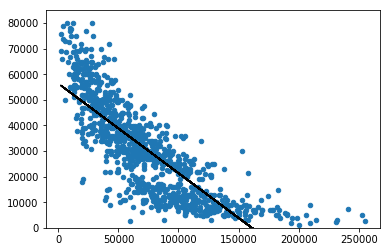

In [6]:
plt.scatter(X, y, s=20)
plt.plot(X, lm.predict(X),color='k')
plt.gca().set_ylim(bottom=0, top=85000)
plt.show()

In [7]:
pred = lm.predict(np.asarray(100000).reshape(-1, 1))
display(Markdown('Lin Reg Prediction for 100K mile car: **{}**'.format(float(pred))))

Lin Reg Prediction for 100K mile car: **21362.3320153**

## Question 2

### Using Cross Validation

In [8]:
k_vals = list(range(1,50, 2))
cv_scores = []

# perform 5-fold cross validation
for k in k_vals:
    knn_model = knn(n_neighbors=k)
    scores = cross_val_score(knn_model, X, y, cv=5)
    cv_scores.append(scores.mean())

In [9]:
best_k = cv_scores.index(max(cv_scores))
print(best_k)

16


In [10]:
knn_model = knn(n_neighbors=best_k).fit(X,y)
price_100k = knn_model.predict(np.array([1e5]).reshape(-1,1))[0]
print('Price for a car with 100k miles: $%.2f' % price_100k)

Price for a car with 100k miles: $19413.06
